In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv("train_users_2.csv")
df_test = pd.read_csv('test_users.csv')




In [2]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [4]:
#X_train = df_train
#X_test = df_test
X_train = df_train.drop(['date_first_booking','country_destination'], axis=1)
X_test = df_test.drop(['date_first_booking'], axis=1)

In [5]:
y_des = df_train['country_destination'].values

df=pd.concat((X_train, X_test), axis=0, ignore_index=True)
df.shape

(275547, 14)

In [6]:
print(df_test.shape[0], "Users in Test", df_train.shape[0], "Users in train")

print("Test Users + Training Users = ", df_test.shape[0] + df_train.shape[0])

62096 Users in Test 213451 Users in train
Test Users + Training Users =  275547


In [7]:
#Fill NA/NaN values using the specified method

df.fillna(method='pad').head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [8]:
# missing data

#df.gender.replace('-unknown-', np.nan, inplace=True)
#df.first_browser.replace('-unknown-', np.nan, inplace=True)

#df.drop('date_first_booking', axis=1, inplace=True)

#df.isnull().sum()

In [9]:
df.loc[df['age']>1000]['age'].describe()
df.loc[df['age']<17]['age'].describe()
df['age'].describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [10]:
df_with_year = df['age'] > 1000
df.loc[df_with_year, 'age'] = 2015 - df.loc[df_with_year, 'age']
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 17, 'age'] = np.nan
df['age'].describe()

count    155848.000000
mean         36.038384
std          11.587113
min          17.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

In [11]:
df.loc[df.age.isnull(), 'age']=df.age.mean()

In [12]:
#Split Date Acount Create

dac = np.vstack(
    df.date_account_created.astype(str).apply(
        lambda x: list(map(int, x.split('-')))
    ).values
)
df['dac_year'] = dac[:, 0]
df['dac_month'] = dac[:, 1]
df['dac_day'] = dac[:, 2]
df = df.drop(['date_account_created'], axis=1)
df.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day
0,gxn3p5htnn,20090319043255,-unknown-,36.038384,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28
1,820tgsjxq7,20090523174809,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25
2,4ft3gnwmtx,20090609231247,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28
3,bjjt8pjhuk,20091031060129,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5
4,87mebub9p4,20091208061105,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14


In [13]:
df1 = df_sessions.user_id.value_counts()
print(df1.shape)
print(df1.head())

(135483,)
mxqbh3ykxl    2722
0hjoc5q8nf    2644
mjbl6rrj52    2476
l5lgm3w5pc    2424
wg9413iaux    2362
Name: user_id, dtype: int64


In [14]:
df1 = df1.to_frame()
df1 = df1.rename(columns = {'user_id' : 'session_count'})
df1['id'] = df1.index
df1.head()

,session_count,id
mxqbh3ykxl,2722,mxqbh3ykxl
0hjoc5q8nf,2644,0hjoc5q8nf
mjbl6rrj52,2476,mjbl6rrj52
l5lgm3w5pc,2424,l5lgm3w5pc
wg9413iaux,2362,wg9413iaux


In [15]:
df = pd.merge(df, df1, how = 'left', on = ['id'])
df.session_count.fillna(-1, inplace = True)
df.session_count = df.session_count.astype(int)

In [16]:
tfa = np.vstack(
    df.timestamp_first_active.astype(str).apply(
        lambda x: list(map(int, [x[:4], x[4:6], x[6:8],
                                 x[8:10], x[10:12],
                                 x[12:14]]))
    ).values
)
df['tfa_year'] = tfa[:, 0]
df['tfa_month'] = tfa[:, 1]
df['tfa_day'] = tfa[:, 2]
df = df.drop(['timestamp_first_active'], axis=1)

In [17]:
oh_features = ['gender', 'signup_method', 'signup_flow', 'language',
                'affiliate_channel', 'affiliate_provider',
                'first_affiliate_tracked', 'signup_app',
                'first_device_type', 'first_browser']

In [18]:
for feature in oh_features:
    df_dummy = pd.get_dummies(df[feature], prefix=feature)
    df = df.drop([feature], axis=1)
    df = pd.concat((df, df_dummy), axis=1)
df.head()

,id,age,dac_year,dac_month,dac_day,session_count,tfa_year,tfa_month,tfa_day,gender_-unknown-,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,gxn3p5htnn,36.038384,2010,6,28,-1,2009,3,19,1,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,38.000000,2011,5,25,-1,2009,5,23,0,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,56.000000,2010,9,28,-1,2009,6,9,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,42.000000,2011,12,5,-1,2009,10,31,0,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,41.000000,2010,9,14,-1,2009,12,8,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#split the well processed dataset into X_train and X_test
X_train = df.iloc[:len(df_train), :]
X_test = df.iloc[len(df_train):, :]
X_train = X_train.drop(['id'], axis=1)
X_train.shape
X_test = X_test.drop(['id'], axis=1)

In [20]:
# label encoding the data

from sklearn.preprocessing import LabelEncoder 
  

le = LabelEncoder()
y_trans = le.fit_transform(y_des)
y_trans.shape

(213451,)

In [21]:
from sklearn.model_selection import train_test_split

dtrain, dtest, train_label, test_label = train_test_split(X_train, y_trans, test_size = 0.3, random_state = 817)


In [22]:
# Logistic Regression - OVR

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logr = LogisticRegression()
logr.fit(dtrain, train_label)


pred_log=logr.predict(dtest)
print(accuracy_score(test_label, pred_log))

C:\Users\baker\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baker\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.603098257230308


In [28]:
# Logistic Regression - Multinomial

#from sklearn.linear_model import LogisticRegression

#logr_mlt = LogisticRegression(n_jobs=1,multi_class='multinomial',solver='newton-cg')
#logr_mlt.fit(dtrain, train_label)



In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=20, n_estimators=100)
rfc.fit(dtrain , train_label)
pred = rfc.predict(dtest)
print(accuracy_score(test_label, pred))

0.6241957648822537


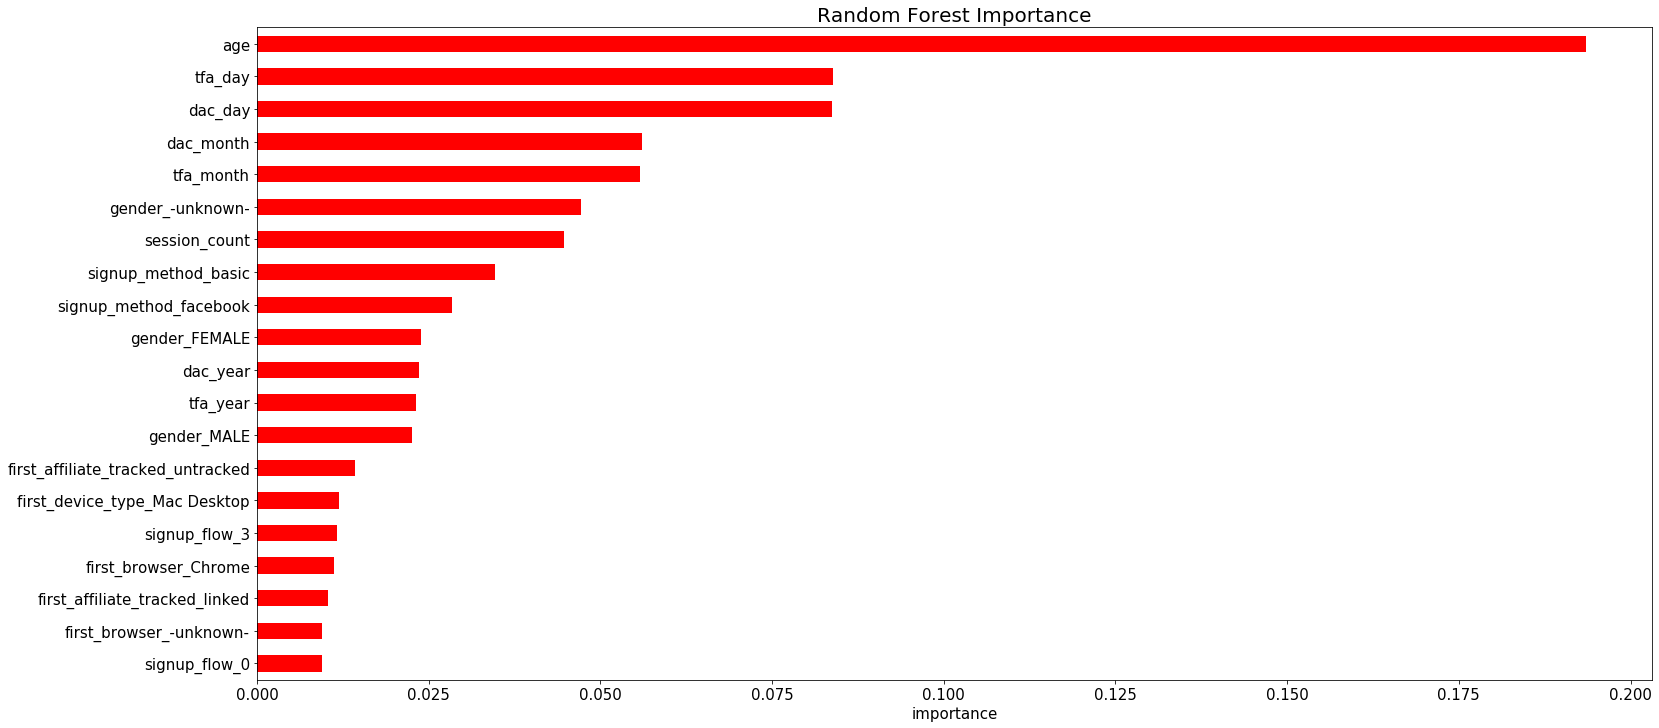

In [31]:
fi=pd.Series(rfc.feature_importances_, index=dtrain.columns)
fn=fi.sort_values(ascending=True)
fn[-20:].plot(kind='barh', color='r', figsize=(25, 12))
plt.xlabel('importance', size=15)
plt.title('Random Forest Importance', size=20)
plt.tick_params(labelsize=15)

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(dtrain , train_label)
pred = dtc.predict(dtest)
print(accuracy_score(test_label, pred))

0.6300674620525955
